<a href="https://colab.research.google.com/github/manashpratim/NIPS-Analysis/blob/master/NIPS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Downloading the datasets
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/491/9097/papers.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561714834&Signature=ZzX3AmnGPVRf8wo3m97I%2B%2Fs%2FjJ3umoNMjPcjCxscCuhL9K65qY0XZj%2FX7nJbSZXJ8FODdxvWwqeD0%2Bqpc0Zmfm85QPnKVIQovo%2BdXuRIkgytxAKOn6f%2BDdbDjw%2FELttFejPQF1WrVgAKXe3L0gE7lTaC05pZ8vR3ysQ%2BU2U6VjiUHUM0xlO63eIohURdU5pCiyH1IHt%2BpI2kMvxe9ivv7a0%2BNNYeM7JQvD8oIYR6Q10FTWqphyKdIoVloQGhpVw2QhDIo5Gcd0Exqal6R8RjbNRe84fQcayogU2wHSPi0CGM1lD2fQBqww3bK3%2Bd2adC6%2B4BKx8sObF3X9%2Fie5gn9A%3D%3D"\
      -O "/tmp/nips.zip"
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/491/991/authors.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561730676&Signature=MpNf3XArOWJGEHn1LpF83deBQXuWcFIMNRbkaYWdLyDyDoF4Mg1f1RDtxpUXGxC%2BaUyg1JisDI%2F3DmH4%2F2OkVIq62728UQunvJTETWbTcrSNo%2FzNvzqGbLwloCe8OicnACfwbweZDAovmrK3HoNcZKNB47o%2FPkMblNBZ23pK1DKrIPFd3crx1nf1TFx7pC52hVtvFYWWC4yyKCwAIePn5Wfn%2FvRGfEbeYx8oA7zp3f%2BtGLsSQqE%2FYMaYB0DMOyDkcS5MGrBvr%2F2mOU8KHsgVAiBFFDmqwMhp0p%2FdbL6igPjZ%2FpFerCsBXmDfT%2FeJw81N5jMw9rQyZVH1zRXSAWm8gQ%3D%3D"\
       -O "/tmp/nips_author.csv"


!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/491/991/paper_authors.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561732101&Signature=eqKzx2HK0zqLM1vUKhKKW4ddwusRa4nJQjfl7%2BA9DfVErIDU1ma9vT2izlv4F8oKVZRpNPCfBAPMYtVnjkS4oivfqLGDxYk1%2B98UQiOPSsoRRIopP9CkIPJyneVYAOavYcgYtge3NsdSXbuYCdoN5DFGh%2FG01qmByWZ5DOqb8X44hQJjmW4t6JW08TXI1CwPfTGj6StrS64k5QauMUwbjVqZtRxuILJ0X0ZCQnpW0WO6gtfIIHhW05xpTWjIdNTtkItPxaLLlHdSN5Enxpbxq8U%2B0utQ6nmlG3%2BoftKDMIEr3AB%2FX3Z%2F2RO9VT%2FtAP8MqhFPg1aPOTKr2x48mEJVzg%3D%3D"\
      -O "/tmp/nips_author_paper.csv"

--2019-06-25 14:31:19--  https://storage.googleapis.com/kaggle-datasets/491/9097/papers.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561714834&Signature=ZzX3AmnGPVRf8wo3m97I%2B%2Fs%2FjJ3umoNMjPcjCxscCuhL9K65qY0XZj%2FX7nJbSZXJ8FODdxvWwqeD0%2Bqpc0Zmfm85QPnKVIQovo%2BdXuRIkgytxAKOn6f%2BDdbDjw%2FELttFejPQF1WrVgAKXe3L0gE7lTaC05pZ8vR3ysQ%2BU2U6VjiUHUM0xlO63eIohURdU5pCiyH1IHt%2BpI2kMvxe9ivv7a0%2BNNYeM7JQvD8oIYR6Q10FTWqphyKdIoVloQGhpVw2QhDIo5Gcd0Exqal6R8RjbNRe84fQcayogU2wHSPi0CGM1lD2fQBqww3bK3%2Bd2adC6%2B4BKx8sObF3X9%2Fie5gn9A%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73128610 (70M) [application/zip]
Saving to: ‘/tmp/nips.zip’

/tmp/nips.zip       100%[===================>]  69.74M  60.8MB/s    in 1.1s    

2019-06-25 14:31:20 (60.8 MB/s) - ‘/tmp/nips.

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/nips.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/nips')
zip_ref.close()

In [0]:
#The nips folder contains a .csv file containing the attributes of the papers.
import csv
fields = [] 
rows = [] 
import numpy as np

with open('/tmp/nips/papers.csv','r') as training_file:
    reader = csv.reader(x.replace('\0', '') for x in training_file)
    fields = next(reader)  
    for row in reader: 
            rows.append(row)

In [0]:
import pandas as pd
df=pd.read_csv('/tmp/nips/papers.csv')
df1=pd.read_csv('/tmp/nips_author.csv')
df2=pd.read_csv('/tmp/nips_author_paper.csv')

In [0]:
df1.rename(columns={'id': 'author_id'}, inplace=True)
df.rename(columns={'id': 'paper_id'}, inplace=True)
result = pd.merge(df1, df2, on="author_id")

Text(0.5, 1.0, 'Yearly Number of Papers')

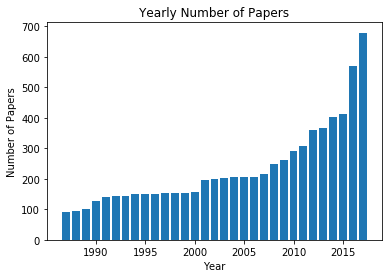

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
x=df['year'].unique()
y=df['year'].value_counts()
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Yearly Number of Papers')

Text(0.5, 1.0, 'Number of Authors per Paper')

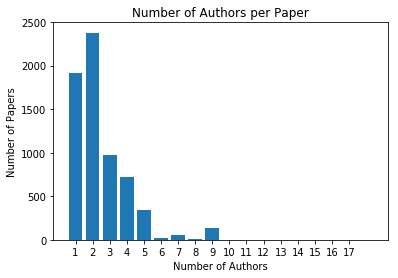

In [99]:
df3=pd.DataFrame({'author_count' : result.groupby( [ "paper_id"] ).size()}).reset_index()
import numpy as np
x=df3['author_count'].unique()
y=df3['author_count'].value_counts()
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df3)
plt.xticks(np.arange(min(x),max(x), 1))
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.title('Number of Authors per Paper')

Text(0.5, 1.0, 'Authors with Highest Number of Published Papers')

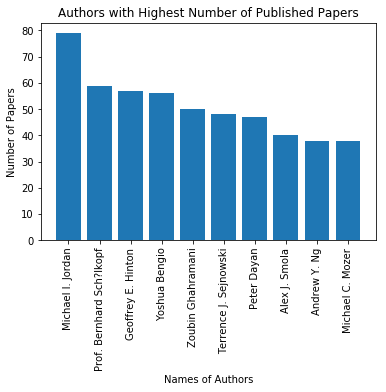

In [125]:
df4=pd.DataFrame({'total_papers' : result.groupby(['author_id','name']).size()}).reset_index()
df5=df4.sort_values('total_papers',ascending=False).head(10)
x=df5['name']
y=df5['total_papers']
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df5)
plt.xticks(rotation='vertical')
plt.xlabel('Names of Authors')
plt.ylabel('Number of Papers')
plt.title('Authors with Highest Number of Published Papers')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0.5, 1.0, 'Authors who Published Papers for Most Years')

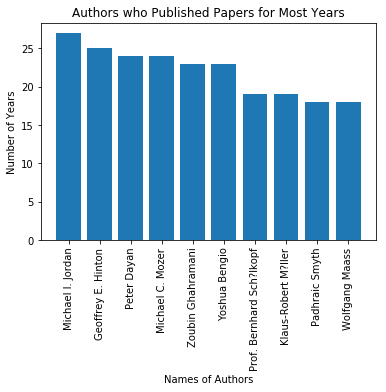

In [192]:
a=df[["author_id","year"]]
a.rename(columns={'author_id': 'paper_id'}, inplace=True)
b=pd.merge(df2, a, on="paper_id")
c=pd.merge(df1,b,on='author_id')
df6=pd.DataFrame({'total_years' : c.groupby(['name']).year.nunique()}).reset_index()
df7=df6.sort_values('total_years',ascending=False).head(10)
x=df7['name']
y=df7['total_years']
plt.bar(x, y, width=0.8, bottom=None, align='center', data=df5)
plt.xticks(rotation='vertical')
plt.xlabel('Names of Authors')
plt.ylabel('Number of Years')
plt.title('Authors who Published Papers for Most Years')